# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [4]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


Let's load the image.

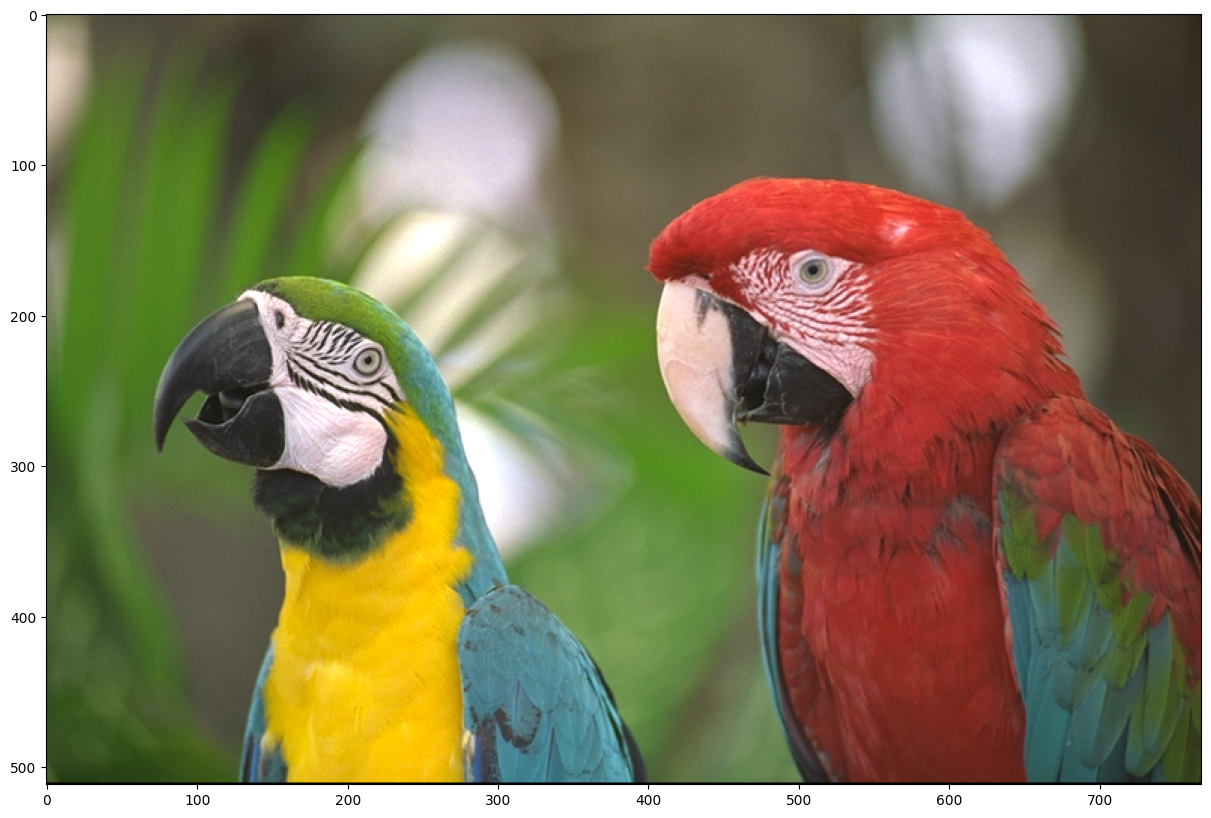

In [5]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)


Let's start with gray tones first.

In [6]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])


Using the colour pallette, let's quantize the original image.


In [7]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors[closest_index]


        # Apply quantization
        quantized[r, c, :] = new_pixel


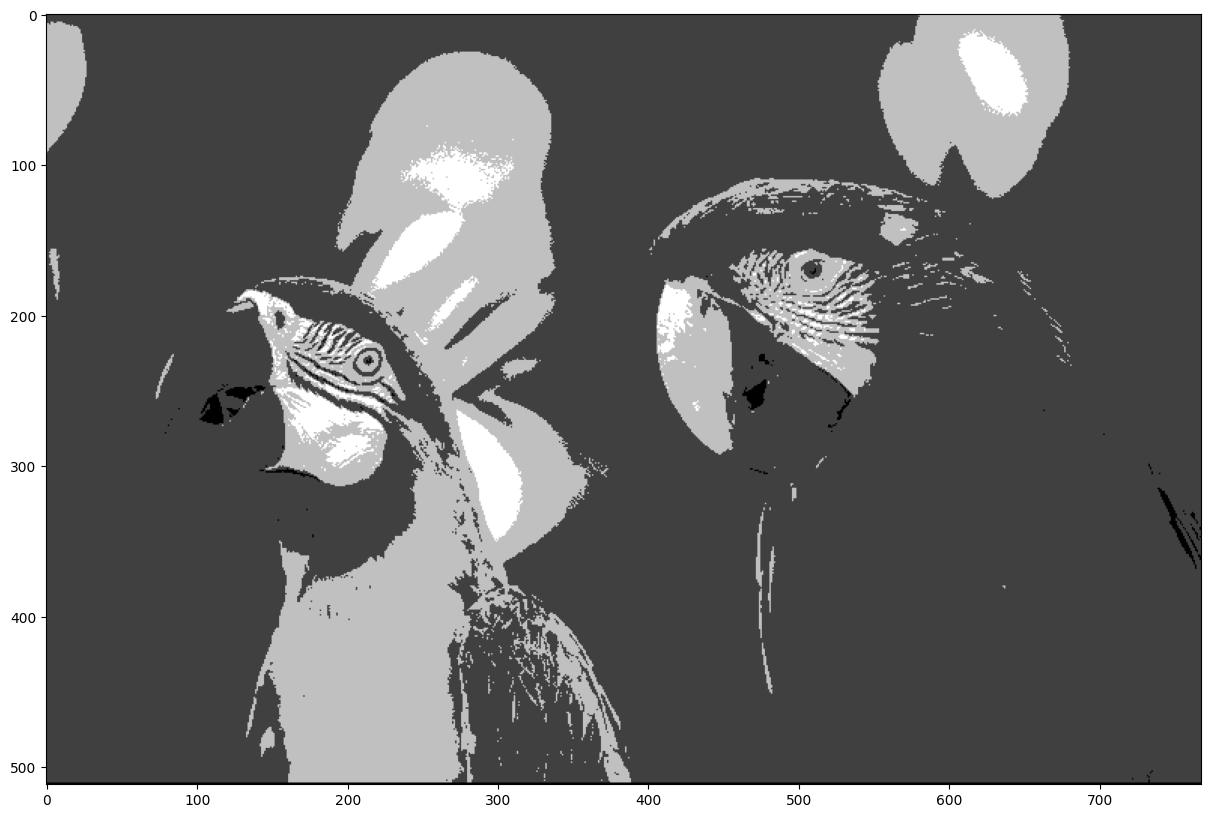

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))


In [9]:
# Compute average quantization error (Peak Signal-to-Noise Ratio (PSNR))
# the image already casted to float
def psnr(ref, target):
    error = ref-target
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, quantized), 'dB')


PSNR 14.826061547883146 dB


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.


In [10]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

from tqdm import tqdm

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Define the Floyd-Steinberg diffusion matrix

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
        # Note: You may need more than one line of code here
        #       img_tmp =
        img_tmp[r, c + 1] += quant_error * 7 / 16        # right
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16    # left, down
        img_tmp[r + 1, c] += quant_error * 5 / 16        # down
        img_tmp[r + 1, c + 1] += quant_error * 1 / 16    # right, down

        # Apply dithering
        dithering[r, c, :] = new_pixel


100%|██████████| 510/510 [00:23<00:00, 22.04it/s]


(<Axes: >, <matplotlib.image.AxesImage at 0x7c4478e770a0>)

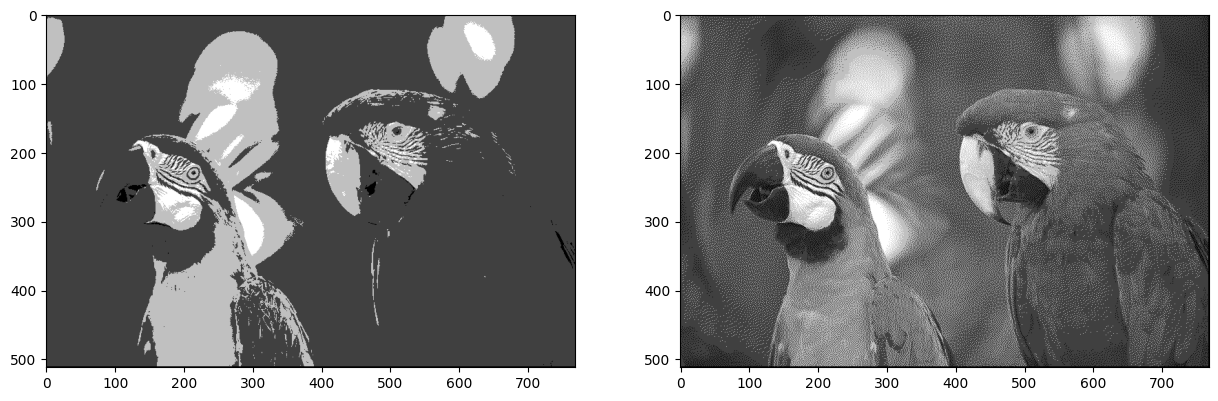

In [11]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering


In [12]:
# Compute average quantization error for dithered image
# the image already casted to float

print('PSNR', psnr(img, quantized), 'dB')
print('PSNR', psnr(img, dithering), 'dB')


PSNR 14.826061547883146 dB
PSNR 12.94152076732435 dB


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?

Quantized image has higher PSNR

* Which image looks better to you?

Dithered image looks better

* Can you repeat the same process using only two colours: black and white? Show me :-)

100%|██████████| 512/512 [00:05<00:00, 88.08it/s] 


PSNR 8.787832707162266 dB


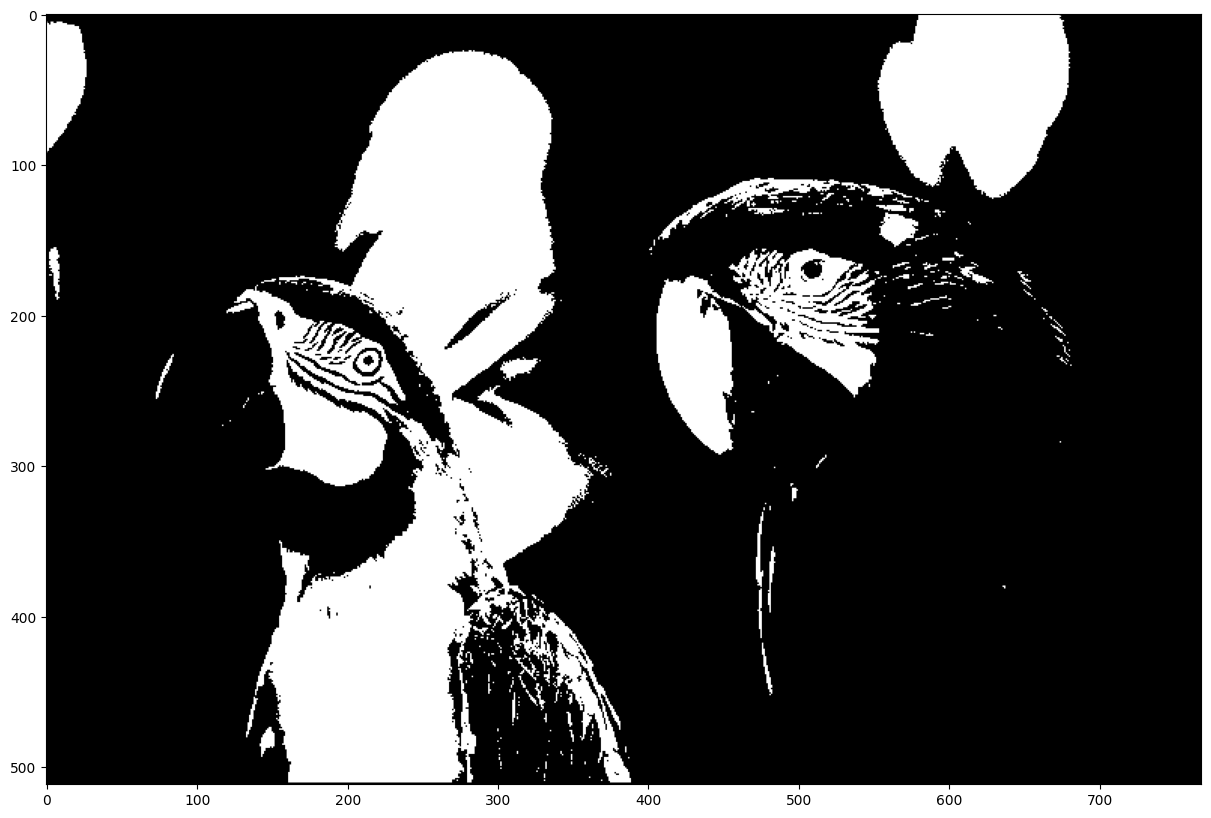

In [13]:
# Black, white
colors2 = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized2 = np.zeros_like(img)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors2 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors2[closest_index]


        # Apply quantization
        quantized2[r, c, :] = new_pixel

# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized2.astype(np.uint8))

# Compute average quantization error (Peak Signal-to-Noise Ratio (PSNR))
# the image already casted to float
def psnr(ref, target):
    error = ref-target
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

print('PSNR', psnr(img, quantized2), 'dB')

In [14]:

# Black, white
colors2 = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering2 = np.zeros_like(img)

# Define the Floyd-Steinberg diffusion matrix

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors2 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors2[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
        # Note: You may need more than one line of code here
        #       img_tmp =
        img_tmp[r, c + 1] += quant_error * 7 / 16        # right
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16    # left, down
        img_tmp[r + 1, c] += quant_error * 5 / 16        # down
        img_tmp[r + 1, c + 1] += quant_error * 1 / 16    # right, down

        # Apply dithering
        dithering2[r, c, :] = new_pixel

100%|██████████| 510/510 [00:14<00:00, 35.96it/s]


In [15]:
# Compute average quantization error (Peak Signal-to-Noise Ratio (PSNR))
# the image already casted to float

print('PSNR', psnr(img, quantized2), 'dB')
print('PSNR', psnr(img, dithering2), 'dB')

PSNR 8.787832707162266 dB
PSNR 6.443435124708508 dB


(<Axes: >, <matplotlib.image.AxesImage at 0x7c447b6dd810>)

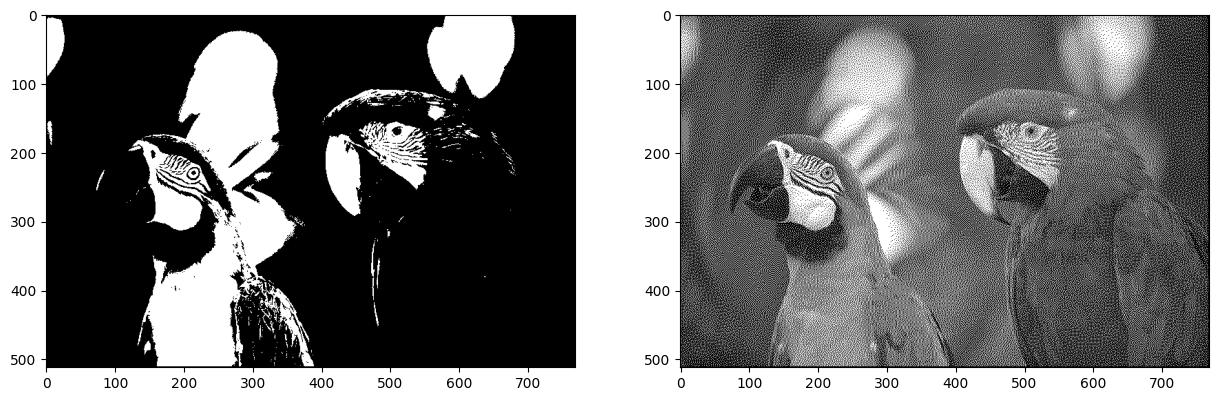

In [16]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized2.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering2.astype(np.uint8))   # dithering

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [17]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The following snippet of code will give you the 16 optimal colours for your original image
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
print(colors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 81.41140736]
 [210.45776321]
 [137.24087783]
 [ 45.21830755]
 [172.64990167]
 [ 93.90271986]
 [250.43738195]
 [106.81783292]
 [ 57.59473731]
 [  4.45985479]
 [229.76211035]
 [152.4184462 ]
 [192.08184619]
 [ 32.21730444]
 [122.01472203]
 [ 69.37739844]]


In [23]:
reshaped_arr = colors.reshape(16, 1)  # Reshape to (16, 1)
colors16 = np.repeat(reshaped_arr, 3, axis=1).astype(int)  # Repeat along axis 1
print(colors16)

[[ 81  81  81]
 [210 210 210]
 [137 137 137]
 [ 45  45  45]
 [172 172 172]
 [ 93  93  93]
 [250 250 250]
 [106 106 106]
 [ 57  57  57]
 [  4   4   4]
 [229 229 229]
 [152 152 152]
 [192 192 192]
 [ 32  32  32]
 [122 122 122]
 [ 69  69  69]]


In [27]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors16 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors16[closest_index]


        # Apply quantization
        quantized[r, c, :] = new_pixel

In [29]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cast the image to float
img = img.astype(float)

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Define the Floyd-Steinberg diffusion matrix

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors16 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors16[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
        # Note: You may need more than one line of code here
        #       img_tmp =
        img_tmp[r, c + 1] += quant_error * 7 / 16        # right
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16    # left, down
        img_tmp[r + 1, c] += quant_error * 5 / 16        # down
        img_tmp[r + 1, c + 1] += quant_error * 1 / 16    # right, down

        # Apply dithering
        dithering[r, c, :] = new_pixel

100%|██████████| 510/510 [00:14<00:00, 34.99it/s]


PSNR 17.11808210550992 dB
PSNR 16.961661512943785 dB


(<Axes: >, <matplotlib.image.AxesImage at 0x7c4477be2f80>)

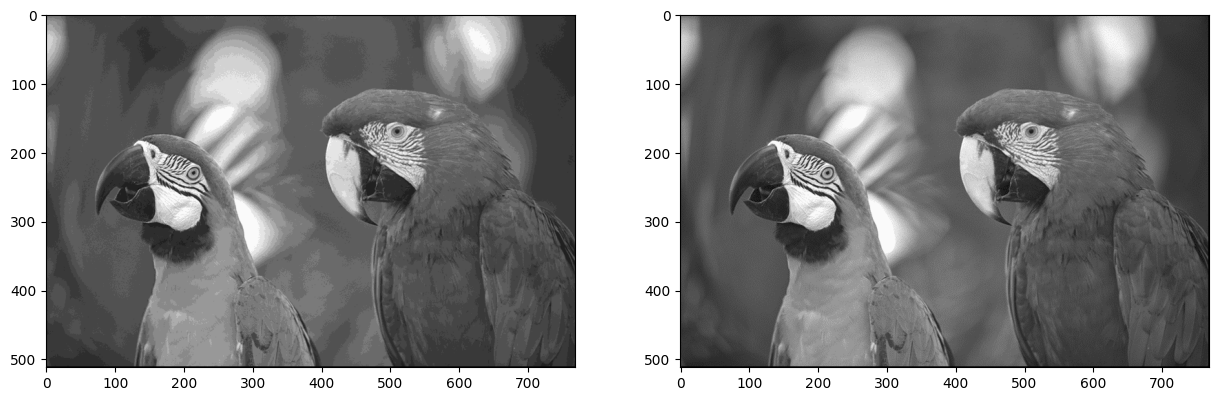

In [30]:
# Compute average quantization error for dithered image
# the image already casted to float

print('PSNR', psnr(img, quantized), 'dB')
print('PSNR', psnr(img, dithering), 'dB')

# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering



Apply FS dithering the same way you did before.

* How does the result look like to you?

Result with the dithering algorithm is much better than quantization

* What happens if we use 32 colours?

As I can see below, the result looks the same and the PSNR is almost the same

* And what happens if we use 256 colours?

I think the result will also be equal

                    
                     Lets try to use 32 colors

In [35]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The following snippet of code will give you the 32 optimal colours for your original image
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
print(colors)

reshaped_arr = colors.reshape(32, 1)  # Reshape to (32, 1)
colors32 = np.repeat(reshaped_arr, 3, axis=1).astype(int)  # Repeat along axis 1
print(colors32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[126.46142505]
 [ 56.09830824]
 [199.34839961]
 [ 91.5383355 ]
 [253.41543789]
 [ 28.66160477]
 [162.9250218 ]
 [104.77970147]
 [ 43.07931307]
 [ 74.46172241]
 [141.0479374 ]
 [221.04039732]
 [180.59334683]
 [  1.16725103]
 [ 62.5143757 ]
 [118.96931811]
 [148.38770735]
 [ 97.89163925]
 [241.63348148]
 [ 80.47245389]
 [ 48.878483  ]
 [ 36.94332246]
 [209.72507225]
 [ 68.40535754]
 [190.05780996]
 [ 14.68587696]
 [155.757949  ]
 [171.02158122]
 [111.85816008]
 [231.24192998]
 [ 86.01974951]
 [133.95182282]]
[[126 126 126]
 [ 56  56  56]
 [199 199 199]
 [ 91  91  91]
 [253 253 253]
 [ 28  28  28]
 [162 162 162]
 [104 104 104]
 [ 43  43  43]
 [ 74  74  74]
 [141 141 141]
 [221 221 221]
 [180 180 180]
 [  1   1   1]
 [ 62  62  62]
 [118 118 118]
 [148 148 148]
 [ 97  97  97]
 [241 241 241]
 [ 80  80  80]
 [ 48  48  48]
 [ 36  36  36]
 [209 209 209]
 [ 68  68  68]
 [190 190 190]
 [ 14  14  14]
 [155 155 155]
 [171 171 171]
 [111 111 111]
 [231 231 231]
 [ 86  86  86]
 [133 133 133]]


In [36]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors32 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors32[closest_index]


        # Apply quantization
        quantized[r, c, :] = new_pixel

In [37]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cast the image to float
img = img.astype(float)

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

# Define the Floyd-Steinberg diffusion matrix

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here

        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((colors32 - pixel) ** 2, axis=1))
        # Find index of the closest color
        closest_index = np.argmin(distances)
        # Get the closest color
        new_pixel = colors32[closest_index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
        # Note: You may need more than one line of code here
        #       img_tmp =
        img_tmp[r, c + 1] += quant_error * 7 / 16        # right
        img_tmp[r + 1, c - 1] += quant_error * 3 / 16    # left, down
        img_tmp[r + 1, c] += quant_error * 5 / 16        # down
        img_tmp[r + 1, c + 1] += quant_error * 1 / 16    # right, down

        # Apply dithering
        dithering[r, c, :] = new_pixel

100%|██████████| 510/510 [00:18<00:00, 27.69it/s]


PSNR 17.159814754305895 dB
PSNR 17.027029355264254 dB


(<Axes: >, <matplotlib.image.AxesImage at 0x7c44775dbc40>)

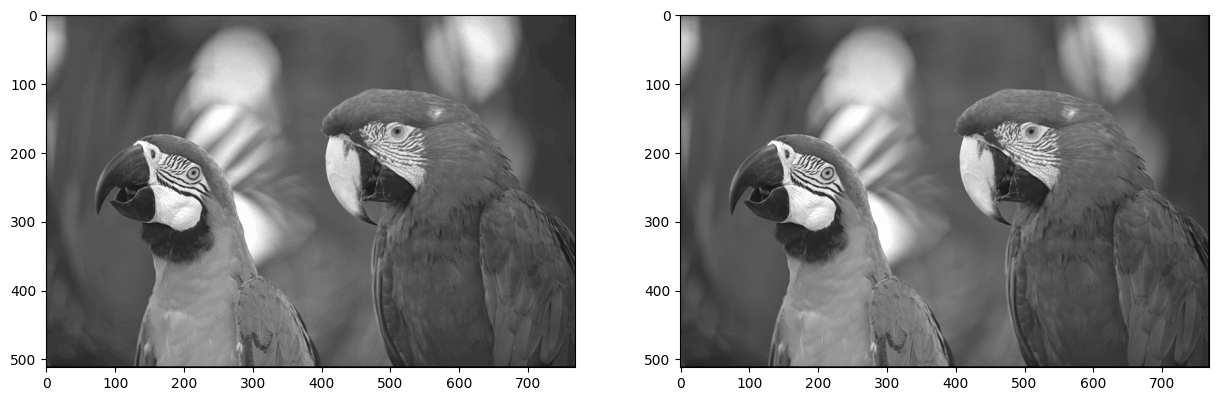

In [38]:
# Compute average quantization error for dithered image
# the image already casted to float

print('PSNR', psnr(img, quantized), 'dB')
print('PSNR', psnr(img, dithering), 'dB')

# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering
